In [1]:
"""
PHY403: HW3
@author: Atma Anand
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

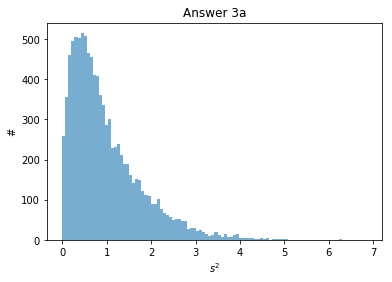

3a) The mean and variance of s^2 distribtion are: 
 Mean = 0.989915, Variance = 0.65547


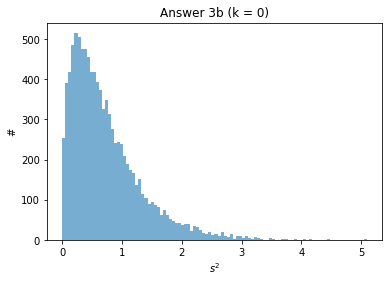

3b) The mean and variance of s^2 distribtion for k = 0 are: 
 Mean = 0.740652, Variance = 0.36482 



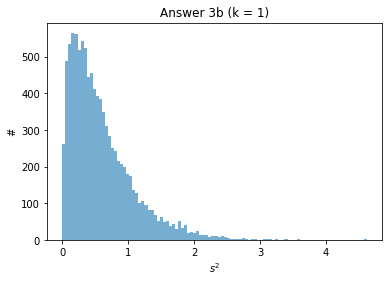

3b) The mean and variance of s^2 distribtion for k = 1 are: 
 Mean = 0.603162, Variance = 0.25034 

3c) The results are as expected


In [4]:
# Problem 3
N, n = 10000, 4
mu, sigma = 0, 1 # mean and standard deviation
s2 = [0]*N

for i in range(N):
	s = np.random.normal(mu, sigma, n)
	s2[i] = (np.std(s, ddof=1))**2 # Each Sample variance

s_mean = np.mean(s2)
s_var = (np.std(s2, ddof=1))**2

plt.hist(s2,bins=100,alpha=0.6)
plt.title("Answer 3a")
plt.xlabel(r'$s^2$')
plt.ylabel("#")
plt.show()

print('3a) The mean and variance of s^2 distribtion are: \n Mean = %5g, Variance = %.5g' %(s_mean, s_var))

# 3b
for k in range(2):
	for i in range(N):
		s = np.random.normal(mu, sigma, n)
		s2[i] = (np.std(s, ddof=-k))**2 # Each Sample variance

	s_mean = np.mean(s2)
	s_var = (np.std(s2, ddof=1))**2

	plt.hist(s2,bins=100,alpha=0.6)
	plt.title("Answer 3b (k = %d)" %(k))
	plt.xlabel(r'$s^2$')
	plt.ylabel("#")
	plt.show()
	print('3b) The mean and variance of s^2 distribtion for k = %d are: \n Mean = %5g, Variance = %.5g \n' %(k, s_mean, s_var))

print('3c) The results are as expected')

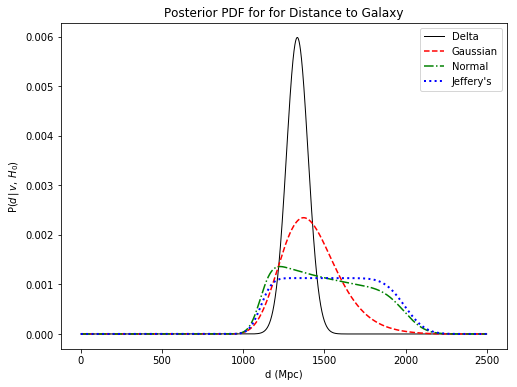

In [8]:
# Problem 4
mu, sigma = 100e3, 5e3 # mean and standard deviation
dl, du = 0, 2.5e3      # Upper, lower limits; No of points
n = 10000              # No of points
dd = (du-dl)/n

def h_normal(h0):
	return np.exp(-0.5*( ((h0 - 72)/8)**2 )) /(np.sqrt(2*np.pi)*8)

def h_uniform(h0):
	if h0 <= 90 and h0 >=50:
		return 1/40
	else:
		return 0

def h_jeffery(h0):
	if h0 <= 90 and h0 >=50:
		return 1/(h0*np.log(1.8))
	else:
		return 0

def v_dist(h0, d, h_dist):
	return np.exp(-0.5*( ((h0*d - mu)/sigma)**2 )) *h_dist(h0) /(np.sqrt(2*np.pi)*sigma)

def v_dist_a(d):
	return np.exp(-0.5*( ((75*d - mu)/sigma)**2 )) /(np.sqrt(2*np.pi)*sigma)

d = np.arange(dl, du+dd, dd)
p_d_v = [0]*len(d)

# 4a
cdf = 0
p_d_v[0] = v_dist_a(d[0])
for i in range(1,n+1):
	p_d_v[i] = v_dist_a(d[i])
	cdf += 0.5*(p_d_v[i]+p_d_v[i-1])*dd

p_d_v = p_d_v/cdf     # Normalize
plt.plot(d, p_d_v, linewidth=1.0, color='black', label='Delta')

# 4b
cdf = 0
# Limiting to 3 sigma to save computation time
p_d_v[0], er = quad(lambda h0:v_dist(h0, d[0], h_normal), 48, 96, args=())
for i in range(1,n+1):
	p_d_v[i], er = quad(lambda h0:v_dist(h0, d[i], h_normal), 48, 96, args=())
	cdf += 0.5*(p_d_v[i]+p_d_v[i-1])*dd

p_d_v = [x / cdf for x in p_d_v]     # Normalize

plt.plot(d, p_d_v, linewidth=1.5, linestyle='--', color='red', label='Gaussian')

# 4c
cdf = 0
p_d_v[0], er = quad(lambda h0:v_dist(h0, d[0], h_uniform), 50, 90, args=())
for i in range(1,n+1):
	p_d_v[i], er = quad(lambda h0:v_dist(h0, d[i], h_uniform), 50, 90, args=())
	cdf += 0.5*(p_d_v[i]+p_d_v[i-1])*dd

p_d_v = [x / cdf for x in p_d_v]     # Normalize

plt.plot(d, p_d_v, linewidth=1.5, linestyle='-.', color='green', label='Normal')

# 4d
cdf = 0
p_d_v[0], er = quad(lambda h0:v_dist(h0, d[0], h_jeffery), 50, 90, args=())
for i in range(1,n+1):
	p_d_v[i], er = quad(lambda h0:v_dist(h0, d[i], h_jeffery), 50, 90, args=())
	cdf += 0.5*(p_d_v[i]+p_d_v[i-1])*dd

p_d_v = [x / cdf for x in p_d_v]     # Normalize

plt.plot(d, p_d_v, ':b', linewidth=2.0, label="Jeffery's")

plt.title("Posterior PDF for for Distance to Galaxy")
plt.xlabel("d (Mpc)")
plt.ylabel(r'P($ d \, | \, v, \, H_0 $)')
plt.legend(loc='best')
plt.gcf().set_size_inches(8, 6)
plt.show()